In [1]:
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import warnings
warnings.filterwarnings('ignore')

In [8]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [20]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [25]:
X_train.shape

(34799, 32, 32, 3)

Text(0.5, 1.0, 'Test')

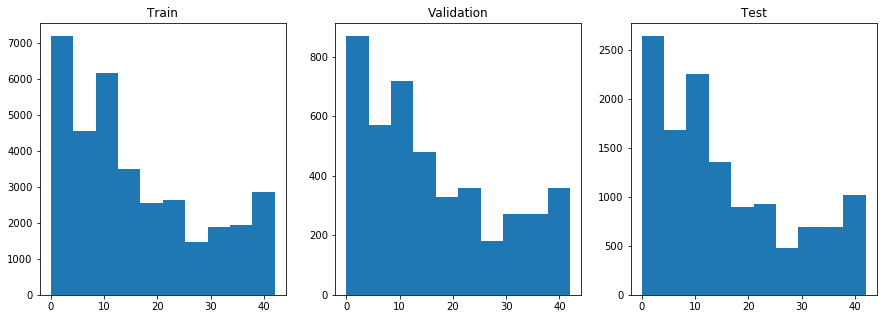

In [224]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].hist(y_train)
axs[0].set_title('Train')

axs[1].hist(y_validation)
axs[1].set_title('Validation')

axs[2].hist(y_test)
axs[2].set_title('Test')

In [ ]:
# train dataset = 34799
# test dataset = 12630
# validation dataset = 4410


8

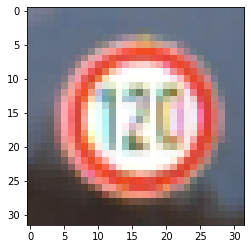

In [155]:
j=np.random.randint(0, 34000)
plt.imshow(X_train[j])
y_train[j]


In [156]:
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train , y_train)

In [157]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [161]:
X_train_gray.shape

(34799, 32, 32, 1)

In [208]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [164]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

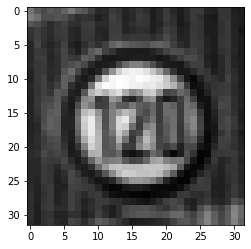

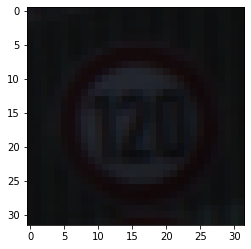

In [172]:
j=np.random.randint(0, 34000)
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [209]:
# Import train_test_split from scikit library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [210]:
image_shape = X_test_gray[i].shape

In [211]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [212]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [213]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [214]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
1088/1088 [==============================] - 11s 10ms/step - loss: 1.1128 - accuracy: 0.6947 - val_loss: 0.5992 - val_accuracy: 0.8161
Epoch 2/50
1088/1088 [==============================] - 10s 9ms/step - loss: 0.2897 - accuracy: 0.9223 - val_loss: 0.4085 - val_accuracy: 0.8855
Epoch 3/50
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1555 - accuracy: 0.9585 - val_loss: 0.4011 - val_accuracy: 0.8882
Epoch 4/50
1088/1088 [==============================] - 10s 9ms/step - loss: 0.1075 - accuracy: 0.9709 - val_loss: 0.3606 - val_accuracy: 0.8982
Epoch 5/50
1088/1088 [==============================] - 10s 9ms/step - loss: 0.0760 - accuracy: 0.9788 - val_loss: 0.3549 - val_accuracy: 0.9043
Epoch 6/50
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0588 - accuracy: 0.9841 - val_loss: 0.4022 - val_accuracy: 0.9043
Epoch 7/50
1088/1088 [==============================] - 13s 12ms/step - loss: 0.0494 - accuracy: 0.9858 - val_loss: 0.4208 - va

In [215]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9199


In [216]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

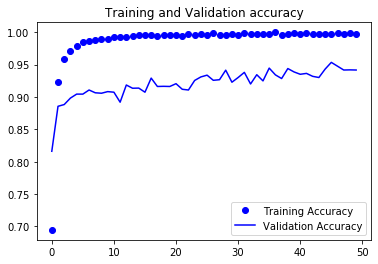

In [217]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


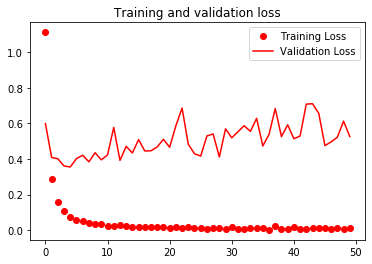

In [218]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [219]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


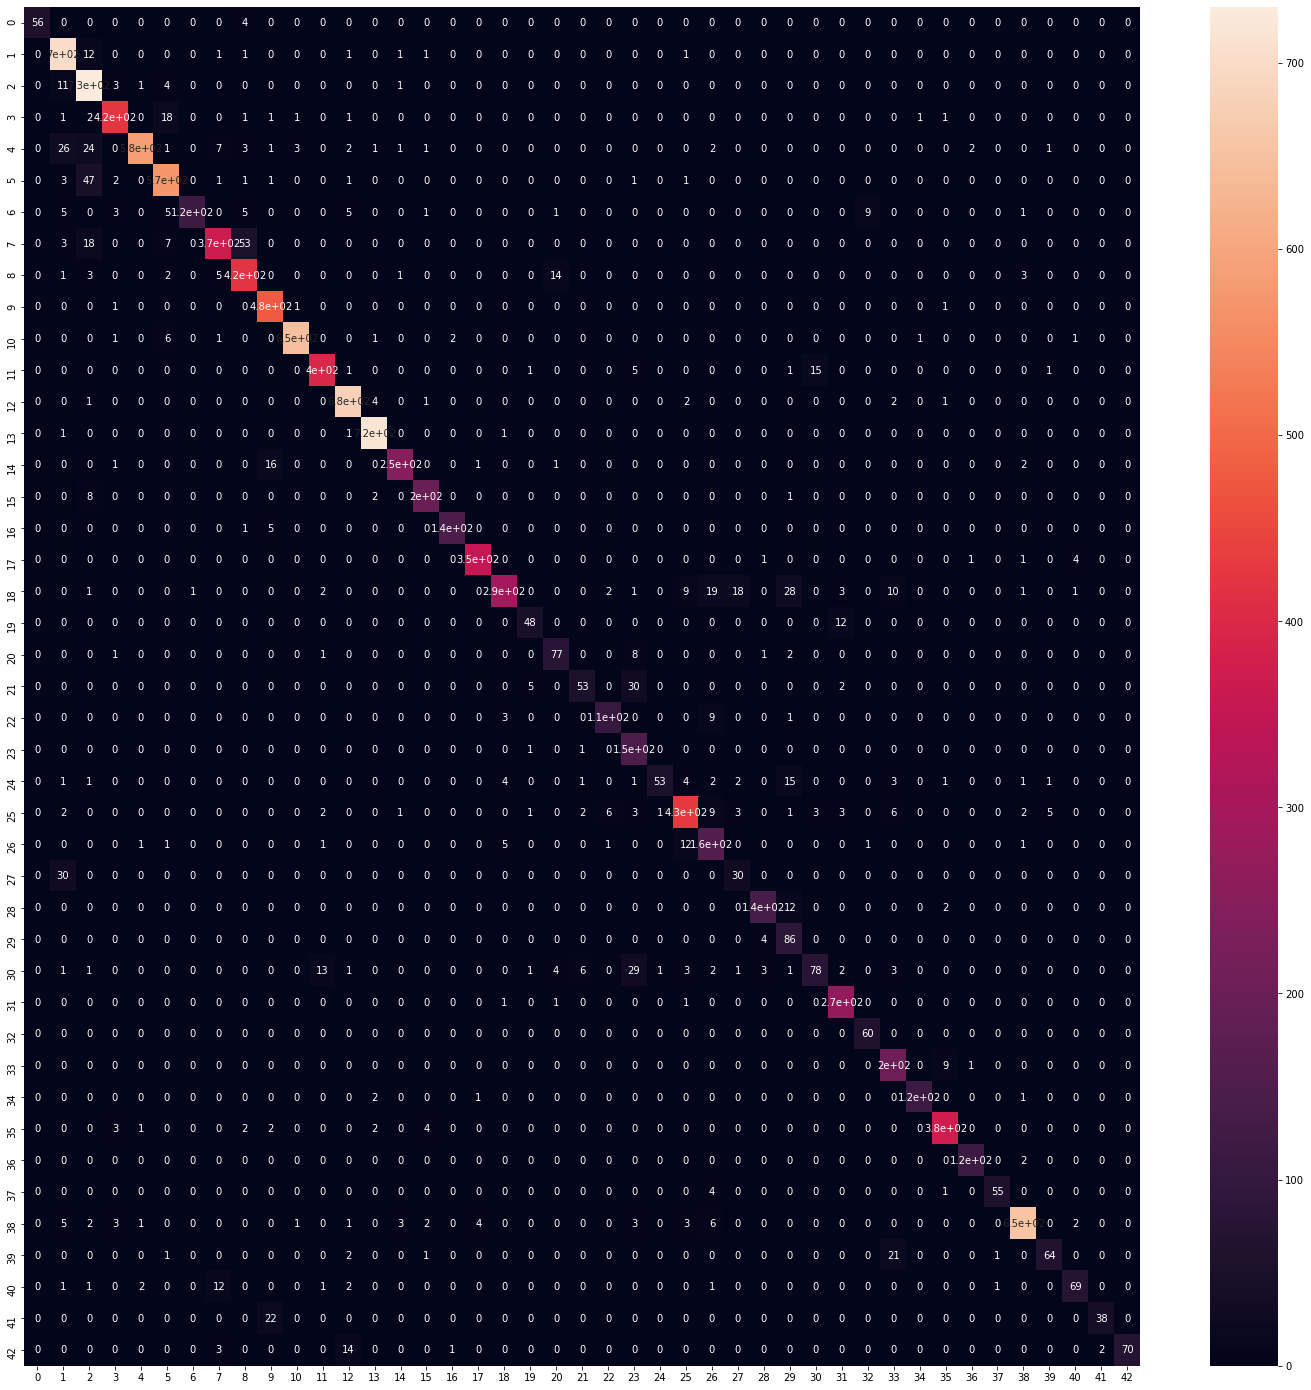

In [221]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

In [222]:
print(classification_report(y_true, predicted_classes))

precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.89      0.97      0.93       720
           2       0.86      0.97      0.91       750
           3       0.96      0.94      0.95       450
           4       0.99      0.89      0.94       660
           5       0.93      0.91      0.92       630
           6       0.99      0.77      0.86       150
           7       0.92      0.82      0.87       450
           8       0.86      0.94      0.89       450
           9       0.91      0.99      0.95       480
          10       0.99      0.98      0.99       660
          11       0.95      0.94      0.95       420
          12       0.95      0.98      0.97       690
          13       0.98      1.00      0.99       720
          14       0.97      0.92      0.94       270
          15       0.95      0.95      0.95       210
          16       0.98      0.96      0.97       150
          17       0.98      0.98      0.

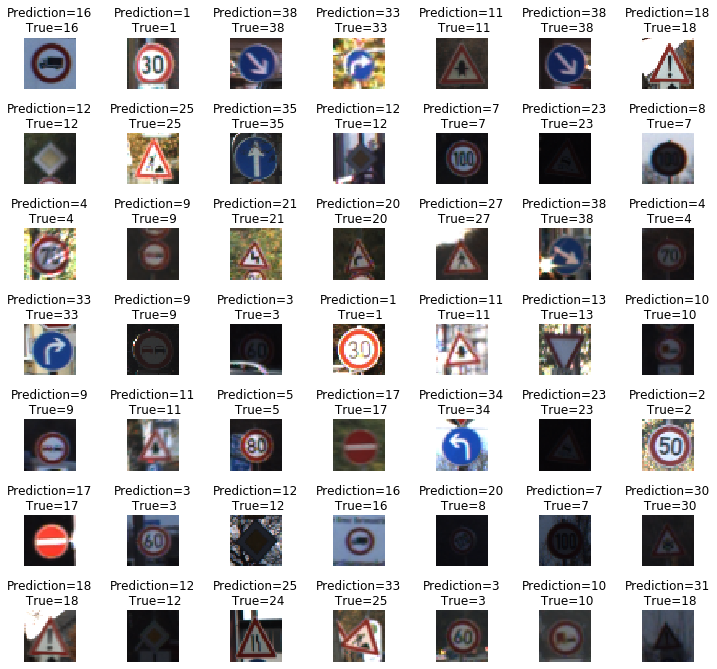

In [223]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)